In [129]:
import torch #Импортируем библиотеку нейронных сетей
import matplotlib.pyplot as plt # Импортируем библиотеку построения графиков
import matplotlib
matplotlib.rcParams['figure.figsize'] = (13.0, 5.0)

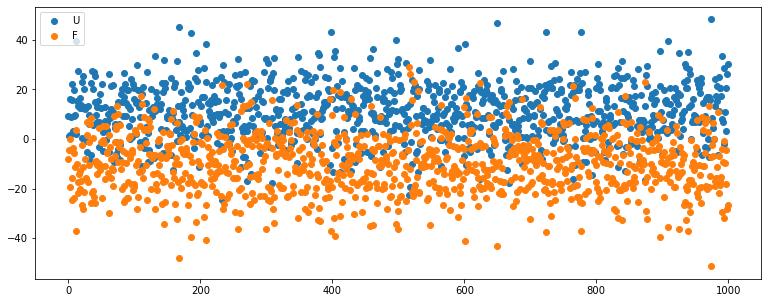

In [130]:
import torch.distributions as tdist #Загружаем библиотеку для распределений
W = 11.0
N = 1000
a=torch.Tensor([1,-1,-5,0.1,0.5])

n = tdist.Normal(torch.tensor([W]), torch.tensor([W])) #Создаём нормальное распределение
U = n.sample((N,))

F = a[0]+a[1]*U+a[2]*torch.sin(2*U)+a[3]*torch.exp(-0.1*U) #Аппроксимируемое выражение

v = tdist.Normal(torch.tensor([0.0]), torch.tensor([2.0])) #Генератор нормального распр.

V = v.sample((N,)) #Генерируем шум

Y=F+V #добавляем шум

plt.plot(U,'o',label='U')
plt.plot(F,'o',label='F')
plt.legend(loc='upper left')


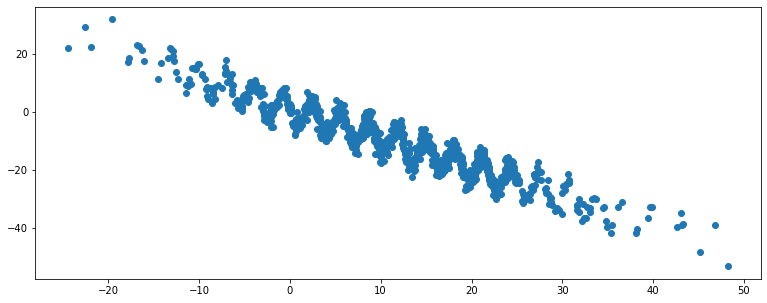

In [131]:
x=U.clone()
#d=F.clone()
d=Y.clone()

plt.plot(x.numpy(), d.numpy(), 'o')

In [132]:
x.shape

torch.Size([1000, 1])

Валидационный сет

torch.Size([1000, 1])

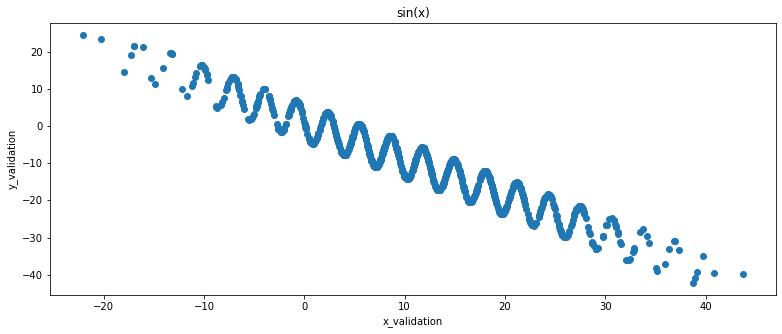

In [133]:
Uv = n.sample((N,))
Fv=a[0]+a[1]*Uv+a[2]*torch.sin(2*Uv)+a[3]*torch.exp(-0.1*Uv)

plt.plot(Uv.numpy(), Fv.numpy(), 'o')
plt.title('sin(x)')
plt.xlabel('x_validation')
plt.ylabel('y_validation');

Uv.shape

Модель 1 Многослойная

In [134]:
class Multilayernet(torch.nn.Module):#Создаём класс с названием нашей нейросети и наследуем её от torch.nn.Module
    def __init__(self, n_hidden_neurons): #передаём количество скрытых нейронов
        super(Multilayernet, self).__init__() #Инициализируем родительский объект
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons) #Создаём полносвязный слой (количество входных нейронов,количество выходных)
        self.act1 = torch.nn.SELU() #Функция активации
        self.fc2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
        self.act2 = torch.nn.SELU()  
        self.fc3 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
        self.act3 = torch.nn.SELU()  
        self.fc4 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
        self.act4 = torch.nn.SELU()  
        self.fc5 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
        self.act5 = torch.nn.SELU()  
        self.fc6 = torch.nn.Linear(n_hidden_neurons, 1)
        
    def forward(self, x): #То как наши слои послеловательно применяются
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)
        x = self.act3(x)
        x = self.fc4(x)
        x = self.act4(x)
        x = self.fc5(x)
        x = self.act5(x)
        x = self.fc6(x)
    
        
        return x

net = Multilayernet(100) #Задаём количество скрытых нейронов, собственно вызываем класс Multilayernet

Модель обычная

class FitNet(torch.nn.Module):#Создаём класс с названием нашей нейросети и наследуем её от torch.nn.Module
    def __init__(self, n_hidden_neurons): #передаём количество скрытых нейронов
        super(FitNet, self).__init__() #Инициализируем родительский объект
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons) #Создаём полносвязный слой (количество входных нейронов,количество выходных)
        self.act1 = torch.nn.SELU() #Функция активации сигмоида
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 1) #Один нейрон на выход как решение задачи регрессии

    def forward(self, x): #То как наши слои послеловательно применяются
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        return x

net = FitNet(50) #Задаём количество скрытых нейронов, собственно вызываем класс FitNet

Предсказание

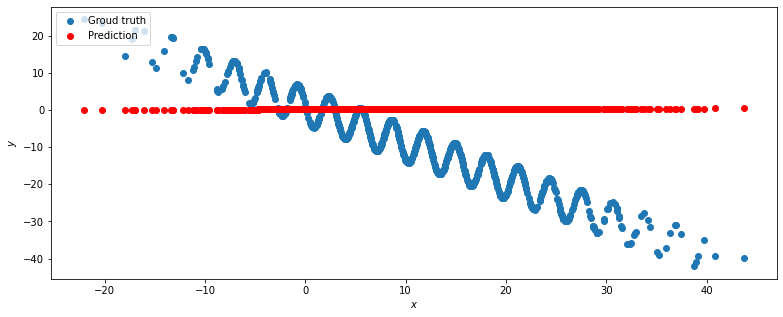

In [135]:
def predict(net, x, y): #Функция вызов метода forward Передаём сеть,Uv и Fv
    y_pred = net.forward(x)

    plt.plot(x.numpy(), y.numpy(), 'o', label='Groud truth')
    plt.plot(x.numpy(), y_pred.data.numpy(), 'o', c='r', label='Prediction');
    plt.legend(loc='upper left')
    plt.xlabel('$x$')
    plt.ylabel('$y$')

predict(net, Uv, Fv)

In [136]:
optimizer = torch.optim.Adam(net.parameters(), lr=0.01) #Метод спуска АДАМ передаём параметры сети(веса по сути) и лёрнигрэйт

In [137]:
def loss(pred, target): #MSE Средне квадратическая ошибка
    squares = (pred - target) ** 2
    return squares.mean()

tensor(7.1264, grad_fn=<MeanBackward0>)


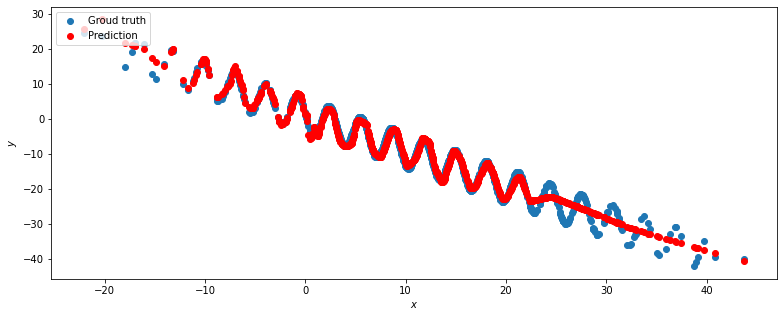

In [138]:
for epoch_index in range(2000): #Эпоха - один шаг градиента по всему датасету
    optimizer.zero_grad() # Обнуляем градиент перед следубщим шагом

    y_pred = net.forward(x) #Делаем форвард по сети(ищем производную)
    loss_val = loss(y_pred, d) #Находим значение функции потерь

    loss_val.backward() #Делаем бэкворд(считаем градиент по функции потерь)

    optimizer.step() #Делаем шаг градиентного спуска

predict(net, Uv, Fv)
print(loss_val)